In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

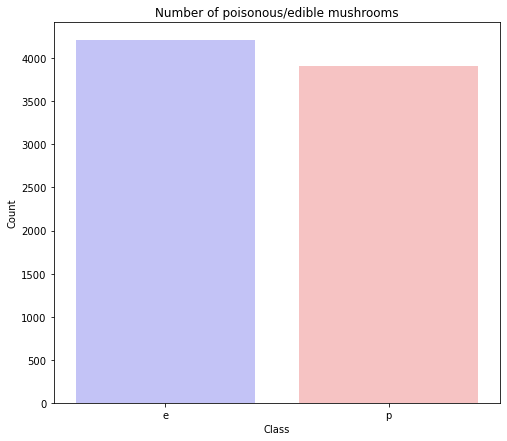

In [5]:
count = df['class'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="bwr")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("count.jpeg", format='jpeg', dpi=300)
plt.show()

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
df.shape

(8124, 23)

In [8]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [9]:
labelencoder_x=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])
    
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [11]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


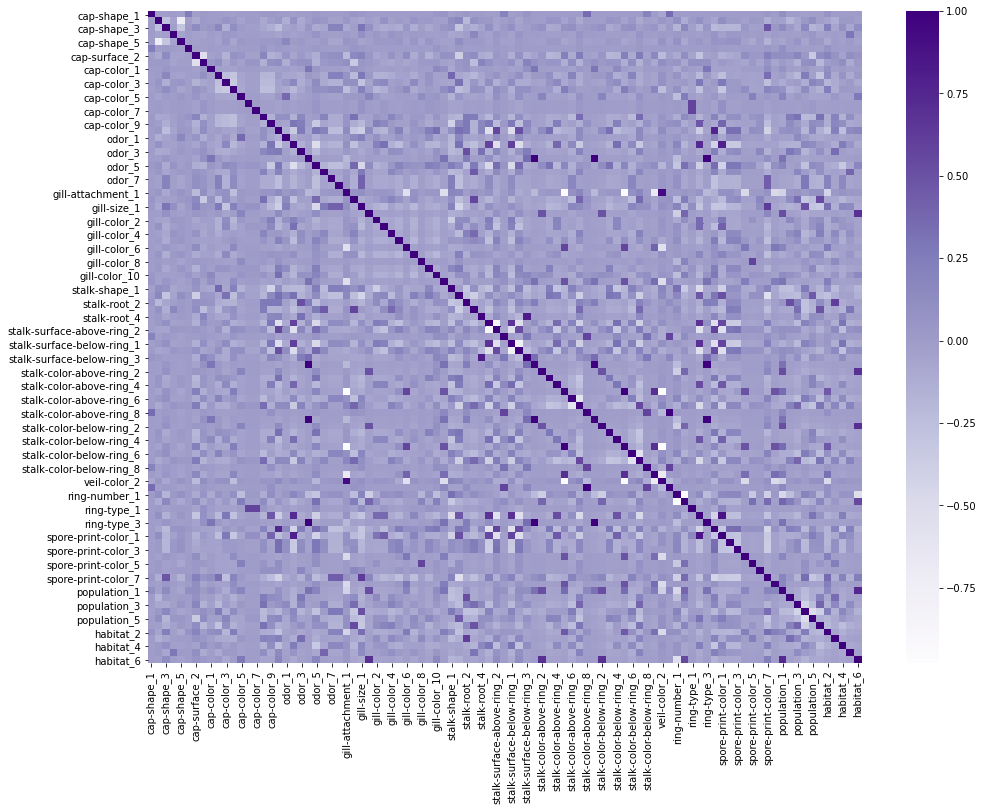

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0);
#plt.savefig("corr2.jpeg", format='jpeg', dpi=300, bbox_inches='tight')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train) 
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


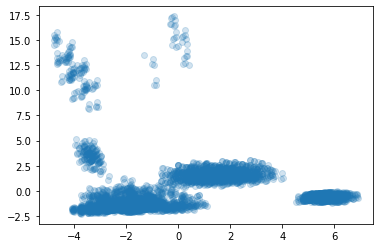

In [18]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [20]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train_pca))))
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9061

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.91      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 432 2303]]

Average Accuracy:	0.9066

Standard Deviation:	0.0103


In [21]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


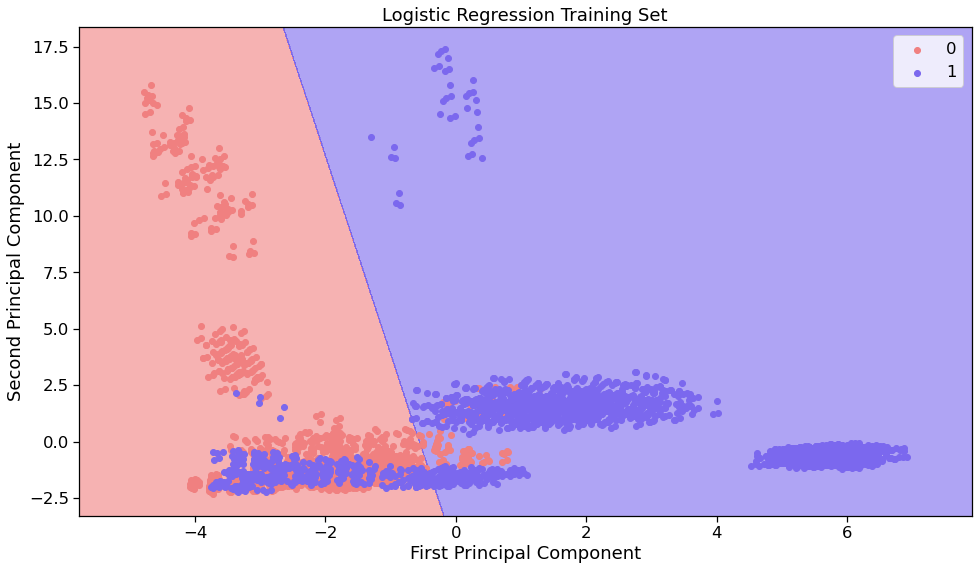

In [22]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Logistic Regression Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("lr_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


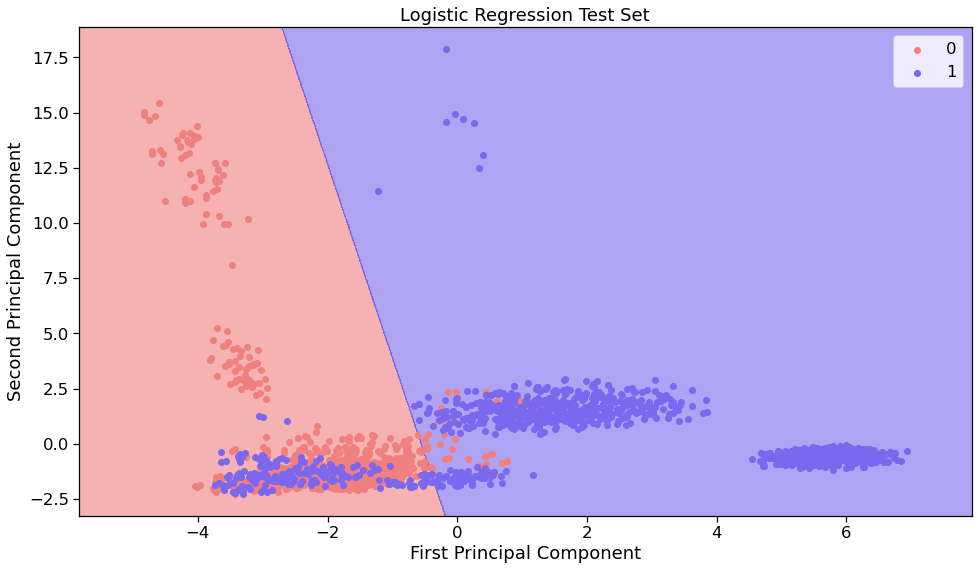

In [23]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Logistic Regression Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("lr_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train_pca))))
res = cross_val_score(dt, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8904

Standard Deviation:	0.0108


In [26]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.8893

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1257
           1       0.88      0.89      0.89      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438


Confusion Matrix:
[[1119  138]
 [ 132 1049]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


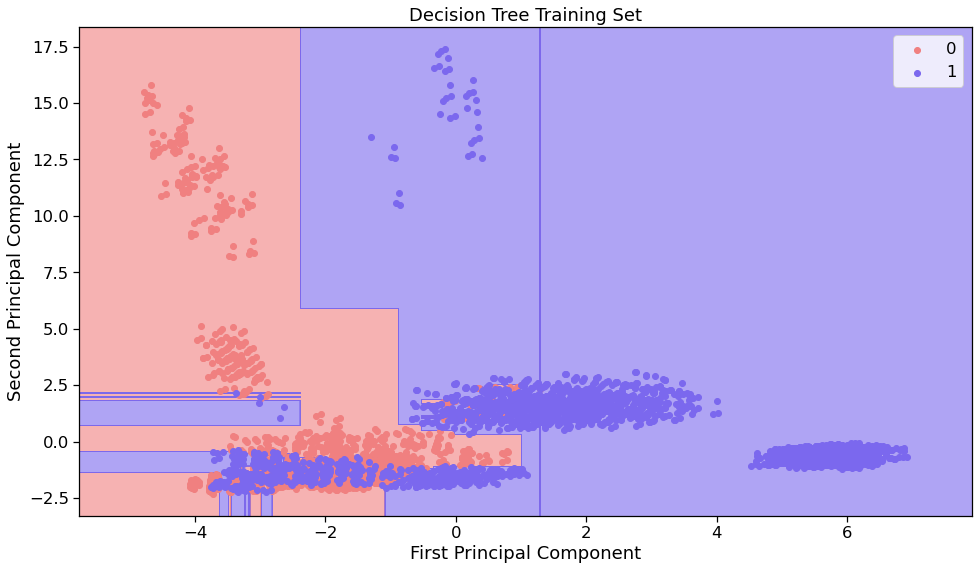

In [27]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Decision Tree Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("dt_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


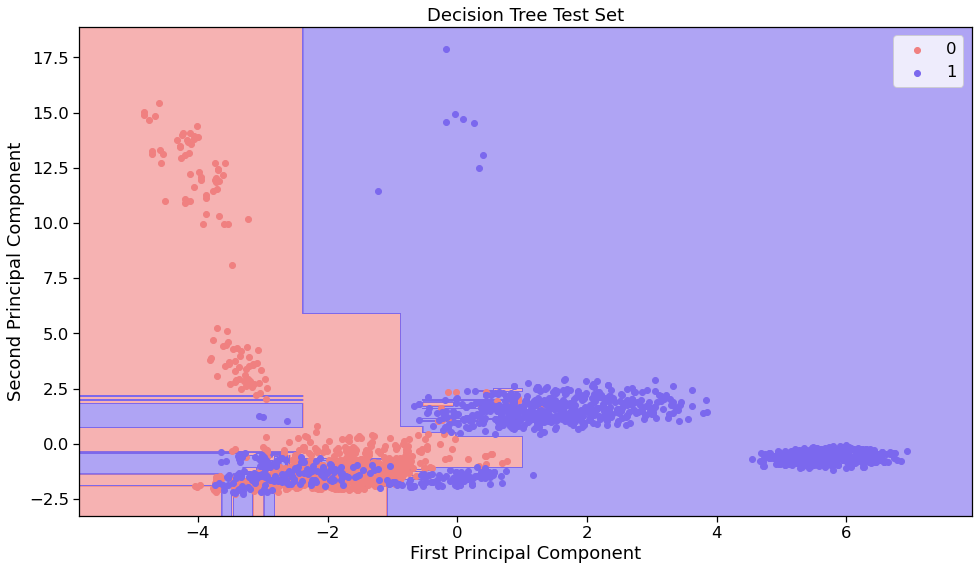

In [28]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Decision Tree Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("dt_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

# Support Vector Machines

In [29]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_pca, y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [30]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train_pca))))
res = cross_val_score(svm, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9240

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2951
           1       0.98      0.86      0.92      2735

    accuracy                           0.92      5686
   macro avg       0.93      0.92      0.92      5686
weighted avg       0.93      0.92      0.92      5686


Confusion Matrix:
[[2893   58]
 [ 374 2361]]

Average Accuracy:	0.9235

Standard Deviation:	0.0104


In [31]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svm.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,svm.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9192

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1257
           1       0.98      0.85      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438


Confusion Matrix:
[[1234   23]
 [ 174 1007]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


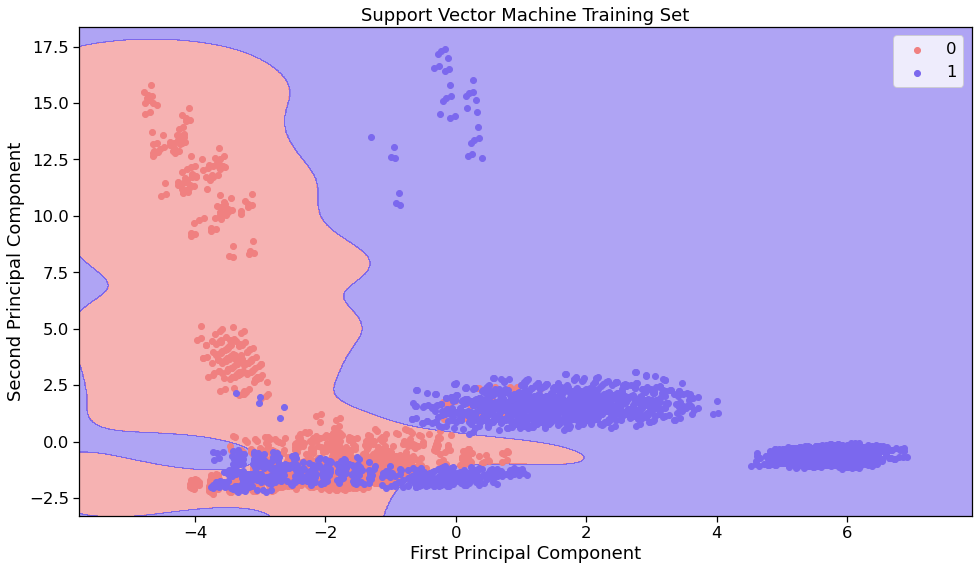

In [32]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machine Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("svm_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


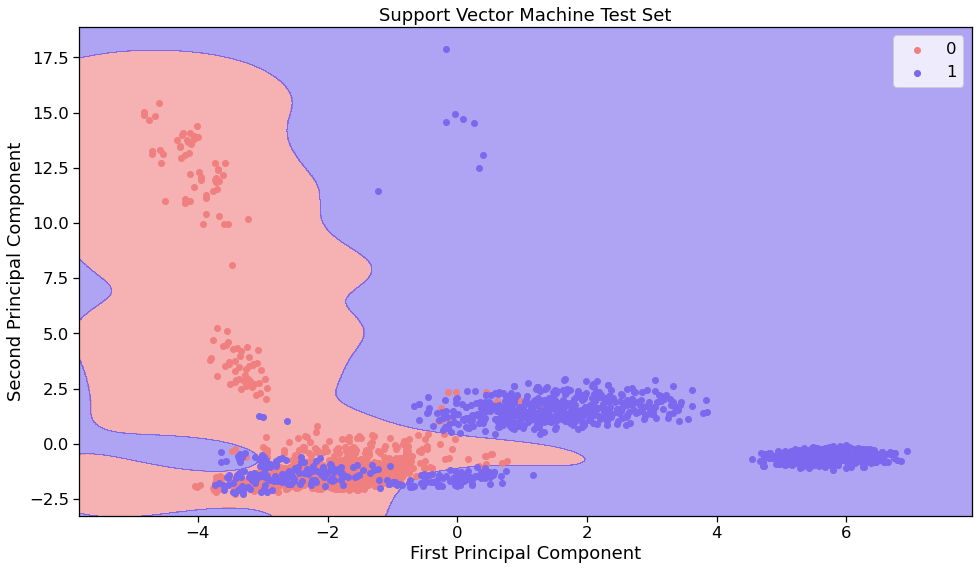

In [33]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machine Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("svm_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

# K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [35]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train_pca))))
res = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9432

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2951
           1       0.97      0.91      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2872   79]
 [ 244 2491]]

Average Accuracy:	0.9288

Standard Deviation:	0.0103


In [36]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,knn.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9204

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1257
           1       0.95      0.88      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1206   51]
 [ 143 1038]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


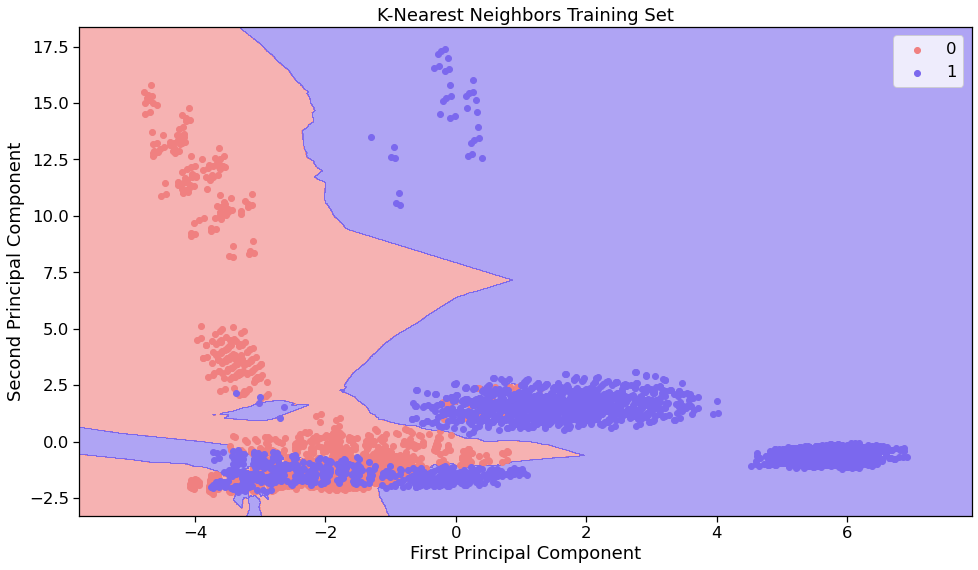

In [37]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("knn_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


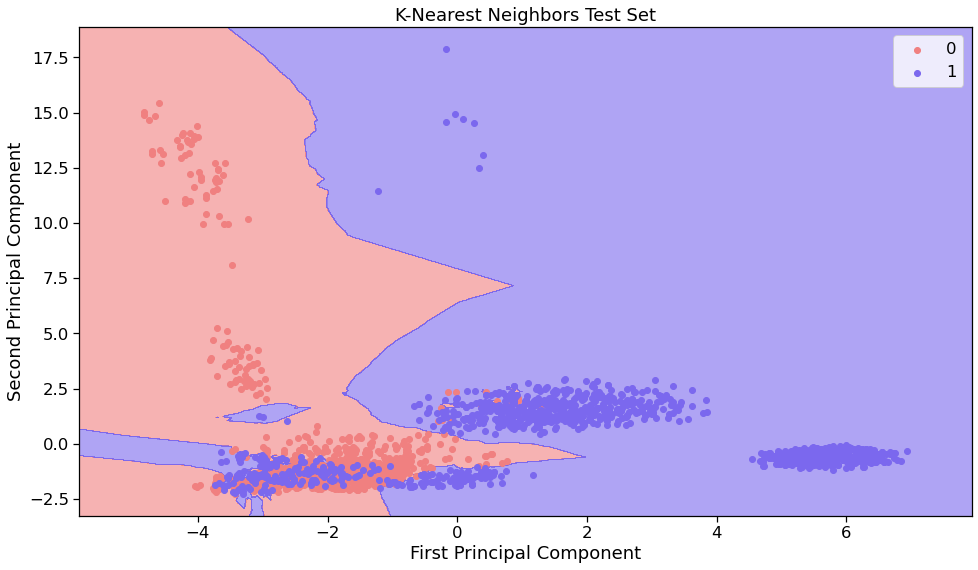

In [38]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("knn_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB as NB

nb = NB()
nb.fit(X_train_pca,y_train)

GaussianNB()

In [40]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,nb.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,nb.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,nb.predict(X_train_pca))))
res = cross_val_score(nb, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.8983

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2850  101]
 [ 477 2258]]

Average Accuracy:	0.8987

Standard Deviation:	0.0113


In [41]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,nb.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,nb.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,nb.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.8975

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 211  970]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


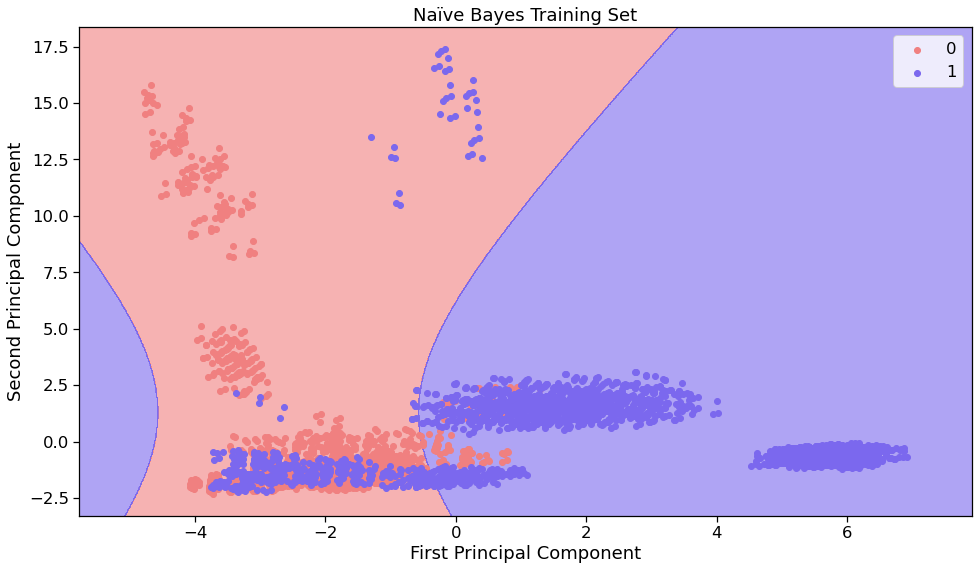

In [42]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Naïve Bayes Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("nb_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


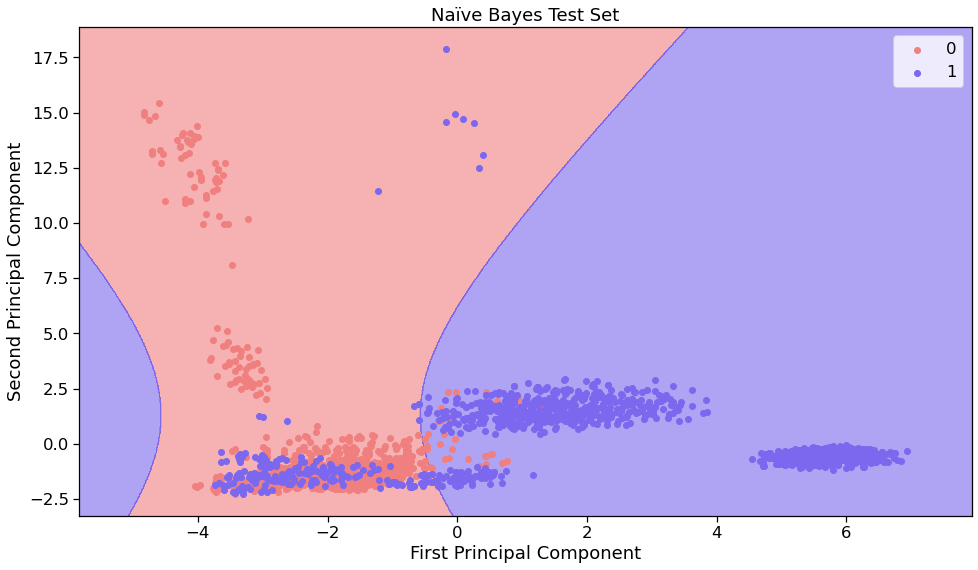

In [43]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Naïve Bayes Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("nb_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [45]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train_pca))))
res = cross_val_score(rf, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   4 2731]]

Average Accuracy:	0.9237

Standard Deviation:	0.0120


In [46]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,rf.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,rf.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9225

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1257
           1       0.95      0.88      0.92      1181

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1206   51]
 [ 138 1043]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


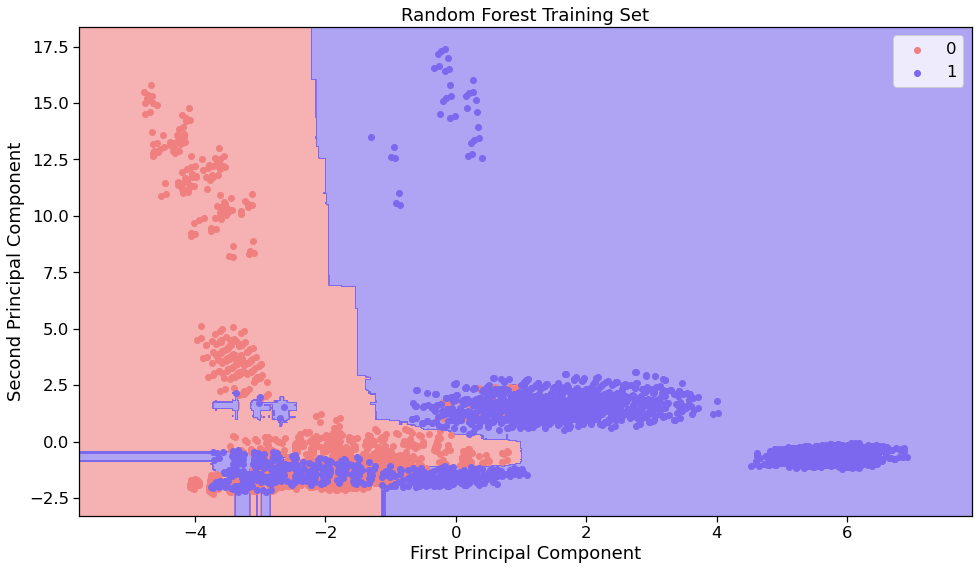

In [47]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("rf_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


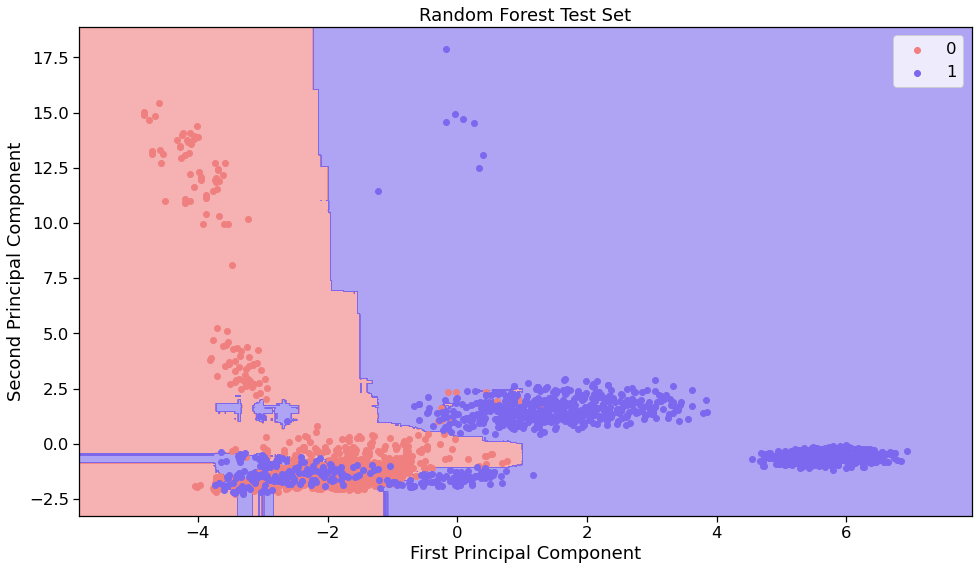

In [48]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("rf_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

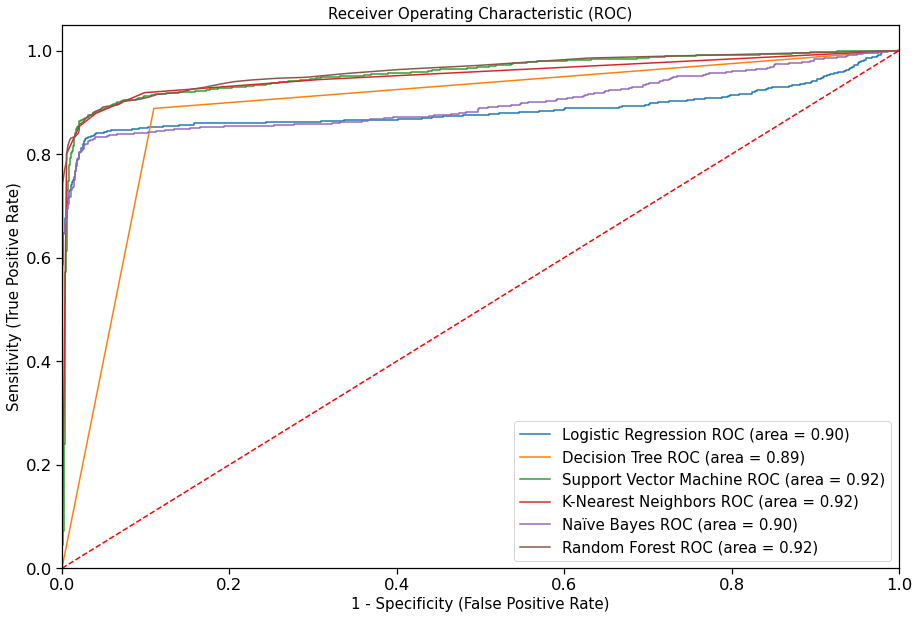

In [49]:
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
},
{
    'label': 'K-Nearest Neighbors',
    'model': knn,
},
{
    'label': 'Naïve Bayes',
    'model': nb,
},
{
    'label': 'Random Forest',
    'model': rf,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train_pca, y_train) 
    y_pred=model.predict(X_test_pca) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.savefig("roc.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()